In [1]:
import pandas as pd
import numpy as np
import glob, os
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

import sys
sys.path.append('../src')
from data import preprocess, config
from features import build_features
from visualization import visualize
import eda

import warnings
warnings.filterwarnings("ignore")

In [2]:
[i for i in glob.glob(config.file_path + config.name_preflix + '*.' + config.file_type)]

['../data/raw\\ec2_cpu_utilization_24ae8d.csv',
 '../data/raw\\ec2_cpu_utilization_53ea38.csv',
 '../data/raw\\ec2_cpu_utilization_5f5533.csv',
 '../data/raw\\ec2_cpu_utilization_77c1ca.csv',
 '../data/raw\\ec2_cpu_utilization_825cc2.csv',
 '../data/raw\\ec2_cpu_utilization_ac20cd.csv',
 '../data/raw\\ec2_cpu_utilization_c6585a.csv',
 '../data/raw\\ec2_cpu_utilization_fe7f93.csv']

Individual filename after cpu_utilization_ could be AIM Image ID from https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/US_SingleMetricPerAMI.html, being a 7 hexadecimal code, our file name being 5 hexadecimal code. Make assumption that filename is AIM Image ID.

In [3]:
df = preprocess.read_multiple_files_with_filename(config.file_path, config.name_preflix
                                                  , config.file_type, config.datetime_column)

In [4]:
eda.get_shape(df)

No. of features: 3
No. of observations: 32256


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32256 entries, 0 to 4031
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  32256 non-null  datetime64[ns]
 1   value      32256 non-null  float64       
 2   aim        32256 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1008.0+ KB


In [6]:
print('First & Last 5 Observations:')
df

First & Last 5 Observations:


,timestamp,value,aim
0,2014-02-14 14:30:00,0.132,24ae8d
1,2014-02-14 14:35:00,0.134,24ae8d
2,2014-02-14 14:40:00,0.134,24ae8d
3,2014-02-14 14:45:00,0.134,24ae8d
4,2014-02-14 14:50:00,0.134,24ae8d
...,...,...,...
4027,2014-02-28 14:02:00,2.456,fe7f93
4028,2014-02-28 14:07:00,2.098,fe7f93
4029,2014-02-28 14:12:00,2.376,fe7f93
4030,2014-02-28 14:17:00,2.426,fe7f93


In [7]:
eda.find_duplicates(df)

No duplicates in ths dataframe


In [8]:
eda.find_uniques(df)

Colunm Name:          timestamp
No. of unique values: 18261
Values:
2014-02-14 14:27:00 - 2014-04-24 00:09:00
--------------------------------------------------------------------------------
Colunm Name:          value
No. of unique values: 7581
Values:
0.062 - 99.898
--------------------------------------------------------------------------------
Colunm Name:          aim
No. of unique values: 8
Values:
['24ae8d' '53ea38' '5f5533' '77c1ca' '825cc2' 'ac20cd' 'c6585a' 'fe7f93']
--------------------------------------------------------------------------------


In [9]:
df = df.rename(columns={'value': 'cpu_utilization'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32256 entries, 0 to 4031
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        32256 non-null  datetime64[ns]
 1   cpu_utilization  32256 non-null  float64       
 2   aim              32256 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1008.0+ KB


Renaming value to cpu_utilization so as not lose the meaning of the data as it was part of the filename

In [10]:
df = build_features.get_datetime_features(df, 'timestamp')

In [11]:
print('First & Last 5 Observations:')
df.transpose()

First & Last 5 Observations:


,0,1,2,3,4,5,6,7,8,9,...,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031
timestamp,2014-02-14 14:30:00,2014-02-14 14:35:00,2014-02-14 14:40:00,2014-02-14 14:45:00,2014-02-14 14:50:00,2014-02-14 14:55:00,2014-02-14 15:00:00,2014-02-14 15:05:00,2014-02-14 15:10:00,2014-02-14 15:15:00,...,2014-02-28 13:37:00,2014-02-28 13:42:00,2014-02-28 13:47:00,2014-02-28 13:52:00,2014-02-28 13:57:00,2014-02-28 14:02:00,2014-02-28 14:07:00,2014-02-28 14:12:00,2014-02-28 14:17:00,2014-02-28 14:22:00
cpu_utilization,0.132,0.134,0.134,0.134,0.134,0.134,0.134,0.134,0.066,0.132,...,2.548,2.75,2.354,2.6,2.262,2.456,2.098,2.376,2.426,3.252
aim,24ae8d,24ae8d,24ae8d,24ae8d,24ae8d,24ae8d,24ae8d,24ae8d,24ae8d,24ae8d,...,fe7f93,fe7f93,fe7f93,fe7f93,fe7f93,fe7f93,fe7f93,fe7f93,fe7f93,fe7f93
date,2014-02-14,2014-02-14,2014-02-14,2014-02-14,2014-02-14,2014-02-14,2014-02-14,2014-02-14,2014-02-14,2014-02-14,...,2014-02-28,2014-02-28,2014-02-28,2014-02-28,2014-02-28,2014-02-28,2014-02-28,2014-02-28,2014-02-28,2014-02-28
year,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,...,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014
month,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
month_name,February,February,February,February,February,February,February,February,February,February,...,February,February,February,February,February,February,February,February,February,February
day,14,14,14,14,14,14,14,14,14,14,...,28,28,28,28,28,28,28,28,28,28
week,7,7,7,7,7,7,7,7,7,7,...,9,9,9,9,9,9,9,9,9,9
day_of_week,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [12]:
print('No. of unique date:', len(df['date'].unique()))
print('Date Range:', min(df['date']), '-', max(df['date']))

No. of unique date: 38
Date Range: 2014-02-14 - 2014-04-24


In [13]:
eda.find_uniques(df[['year', 'month', 'month_name','day', 'week', 'day_of_week', 'day_of_week_name'
                    , 'is_weekend', 'time', 'hour', 'minute', 'second']])

Colunm Name:          year
No. of unique values: 1
Values:
[2014]
--------------------------------------------------------------------------------
Colunm Name:          month
No. of unique values: 2
Values:
[2 4]
--------------------------------------------------------------------------------
Colunm Name:          month_name
No. of unique values: 2
Values:
['February' 'April']
--------------------------------------------------------------------------------
Colunm Name:          day
No. of unique values: 27
Values:
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28]
--------------------------------------------------------------------------------
Colunm Name:          week
No. of unique values: 7
Values:
[ 7  8  9 14 15 16 17]
--------------------------------------------------------------------------------
Colunm Name:          day_of_week
No. of unique values: 7
Values:
[1 2 3 4 5 6 7]
----------------------------------------------------------------------

Defualt pandas weekofday function returns 0 to 6, Monday to Sunday, added 1 on every day of week to so it is easier to see and understand week of day.

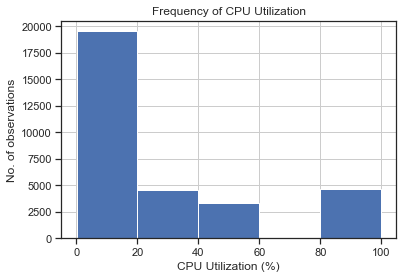

In [14]:
visualize.plot_histogram_custom_bins(df, 'cpu_utilization', 5, 'CPU Utilization (%)'
                                     , 'No. of observations', 'Frequency of CPU Utilization')

CPU Utilization (%) seems to stay at 0 to 20 % for most of the observations

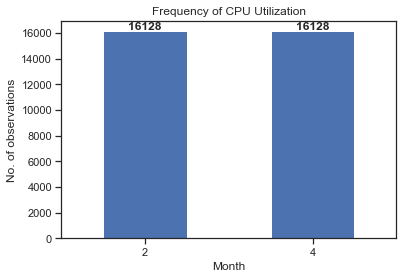

In [15]:
visualize.plot_bar(df, 'month', False, 'Month', 'No. of observations', 'Frequency of CPU Utilization')

Both months has equal observations

In [16]:
df.groupby(['month', 'aim']).agg({'cpu_utilization': ['count']})

cpu_utilization
                       count
month aim                   
2     24ae8d            4032
      53ea38            4032
      5f5533            4032
      fe7f93            4032
4     77c1ca            4032
      825cc2            4032
      ac20cd            4032
      c6585a            4032

1. 4 AIM IDs were only used on February while other the 4 AIM IDs were used on April
2. All AIM IDs has the same number observations

In [17]:
df = df.sort_values(by = 'timestamp')

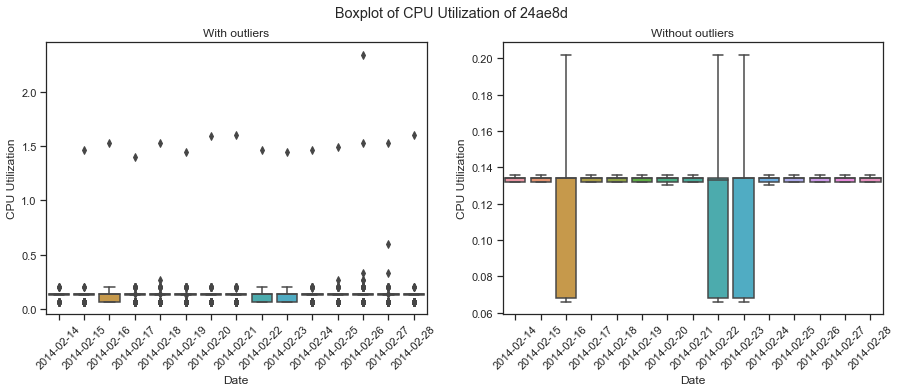

In [18]:
visualize.plot_boxplot(df, 'aim', '24ae8d', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of 24ae8d
1. Outliers seems to have a trend on its own
2. Most dates same a pretty small spread of CPU Utilization percentage except for 16th, 22nd & 23rd
3. Such low percentage means CPU is in idle

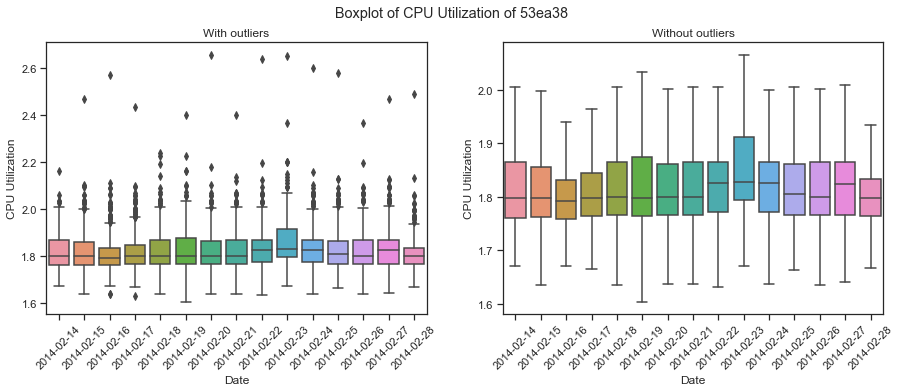

In [19]:
visualize.plot_boxplot(df, 'aim', '53ea38', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of 53ae38
1. The mean CPU Utilization percentage stays the same almost thoughout.
2. Minimun & Maximun CPU Utilization percentage fluctures within 0.5%
3. Such low percentage means CPU is in idle

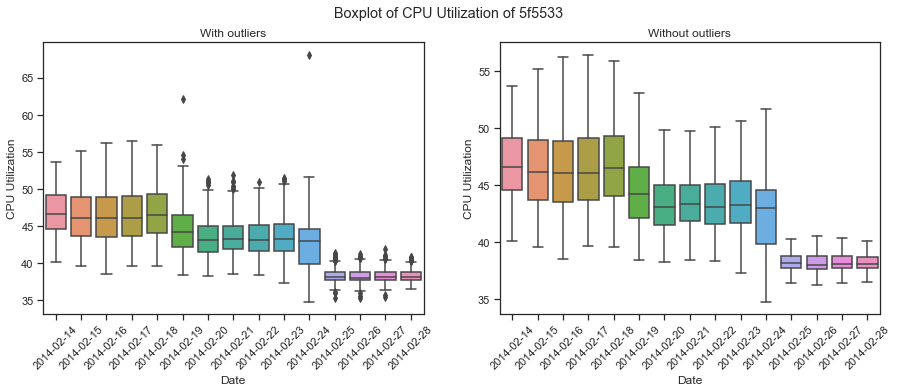

In [20]:
visualize.plot_boxplot(df, 'aim', '5f5533', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of 5f5533
1. The mean, minimun & maximun CPU Utilization percentage stays fluctures thoughout
2. Spread of CPU Utilization percentage gets smaller over time
3. CPU Utilization seems moderately utilize, most of the time less than 50% CPU Utilization

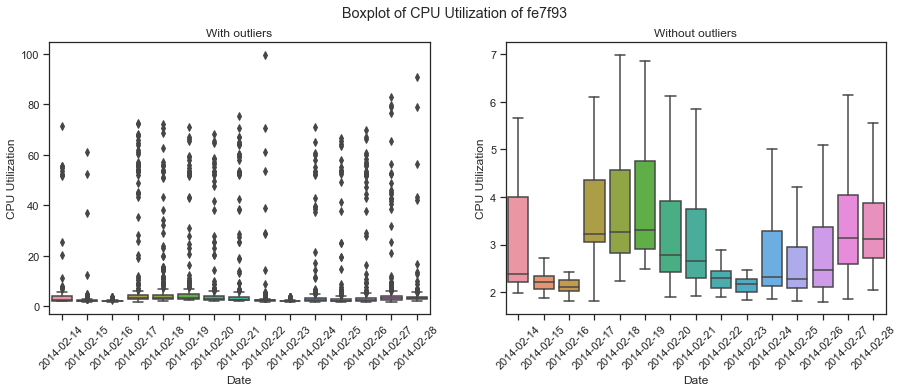

In [21]:
visualize.plot_boxplot(df, 'aim', 'fe7f93', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of fe7f93
1. A lot of outliers from moderately low to very high CPU Utilization thoughout the month
2. Spread, max & mean of CPU Utilization seems to have a up down pattern
3. CPU Utilization seems to be in idile most of the time with a lot of spikes to very high utilization

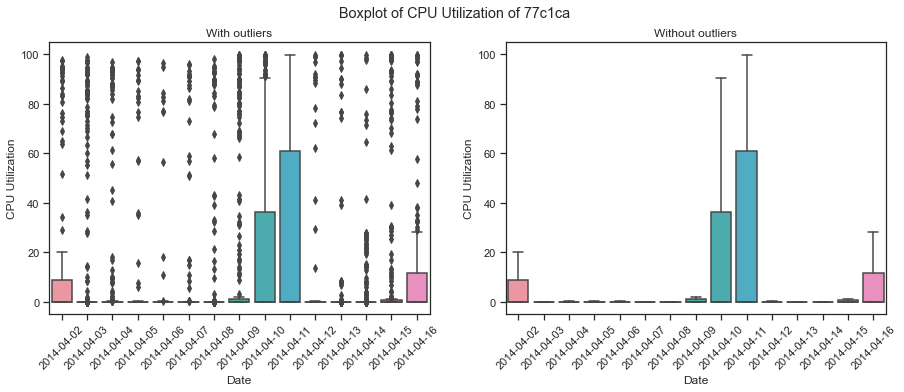

In [22]:
visualize.plot_boxplot(df, 'aim', '77c1ca', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of 77c1ca
1. A lot of outliers from moderately low to very high CPU Utilization thoughout the month
2. CPU seems to be idle most of the time with 2 days going up used a lot
3. No more observation after 16th

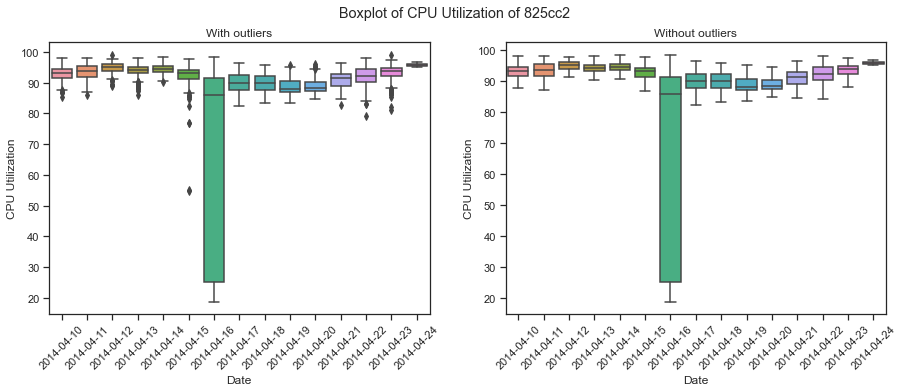

In [23]:
visualize.plot_boxplot(df, 'aim', '825cc2', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of fe7f93
1. Outliers seems very minimal
2. Spread of CPU Utilization seems to stay small wiht 1 day havgin very big spread
3. CPU Utilization seems to be in fully utilize most of the time with one day going 16th not being fully utilize
4. No observation before 10th and after 24th

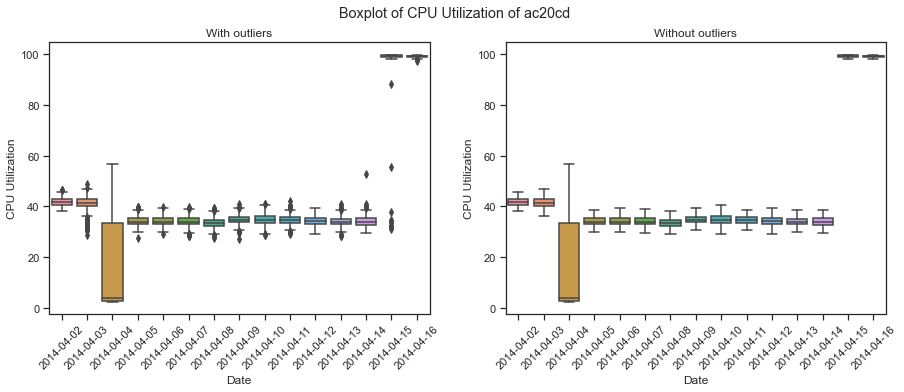

In [24]:
visualize.plot_boxplot(df, 'aim', 'ac20cd', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of fe7f93
1. CPU Utilization seems to be moderately utilized with 15th & 16th bring fully utilize
2. No more observation after 16th

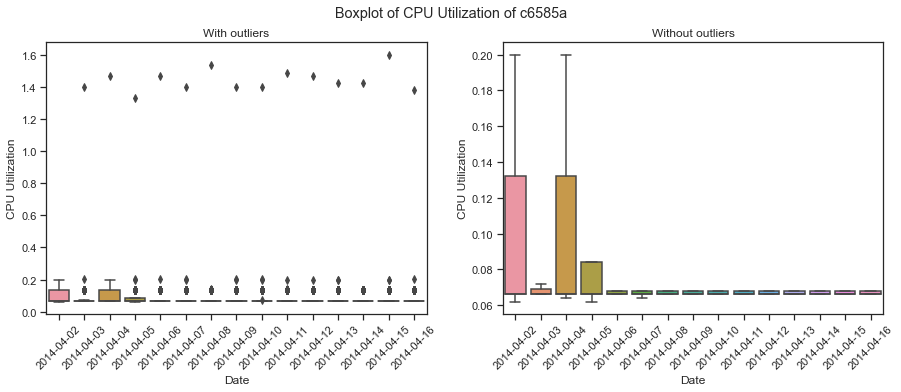

In [25]:
visualize.plot_boxplot(df, 'aim', 'c6585a', 'date', 'cpu_utilization'
                       , 'Date', 'CPU Utilization', 'With outliers', 'Without outliers')

Boxplot of c6585a
1. Outliers seems to have a trend on its own
2. Most dates same a pretty small spread of CPU Utilization percentage except for 2nd & 4th
3. Such low percentage means CPU is in idle
4. No more observation after 16th

In [26]:
aim_24ae8d = df[(df['aim'] == '24ae8d')]

In [27]:
aim_24ae8d.set_index('timestamp',inplace=True)

In [28]:
aim_24ae8d = aim_24ae8d.resample('H').mean()

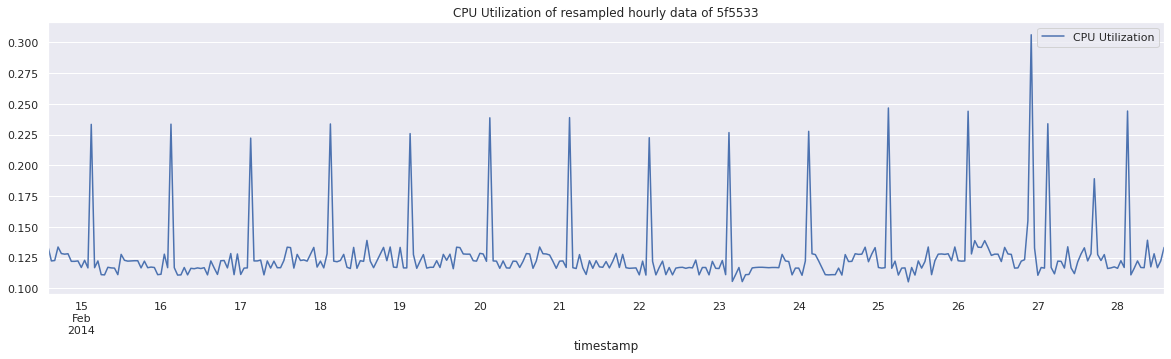

In [29]:
visualize.plot_line_index(aim_24ae8d, 'timestamp', 'cpu_utilization'
                            , 'CPU Utilization of resampled hourly data of 5f5533', 'CPU Utilization')

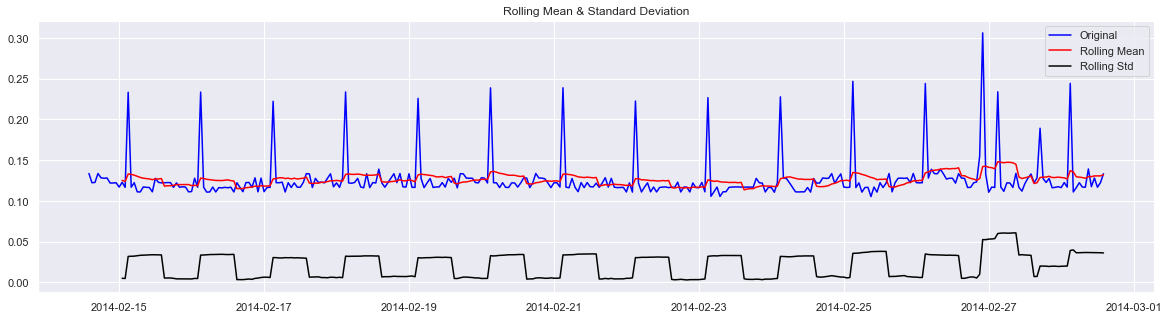

Results of Dickey-Fuller Test:
Test Statistic                -1.851558e+01
p-value                        2.111865e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.360000e+02
Critical Value (1%)           -3.449963e+00
Critical Value (5%)           -2.870181e+00
Critical Value (10%)          -2.571373e+00
dtype: float64
Is the time series stationary? False


In [30]:
visualize.plot_test_stationarity(aim_24ae8d, 'cpu_utilization')

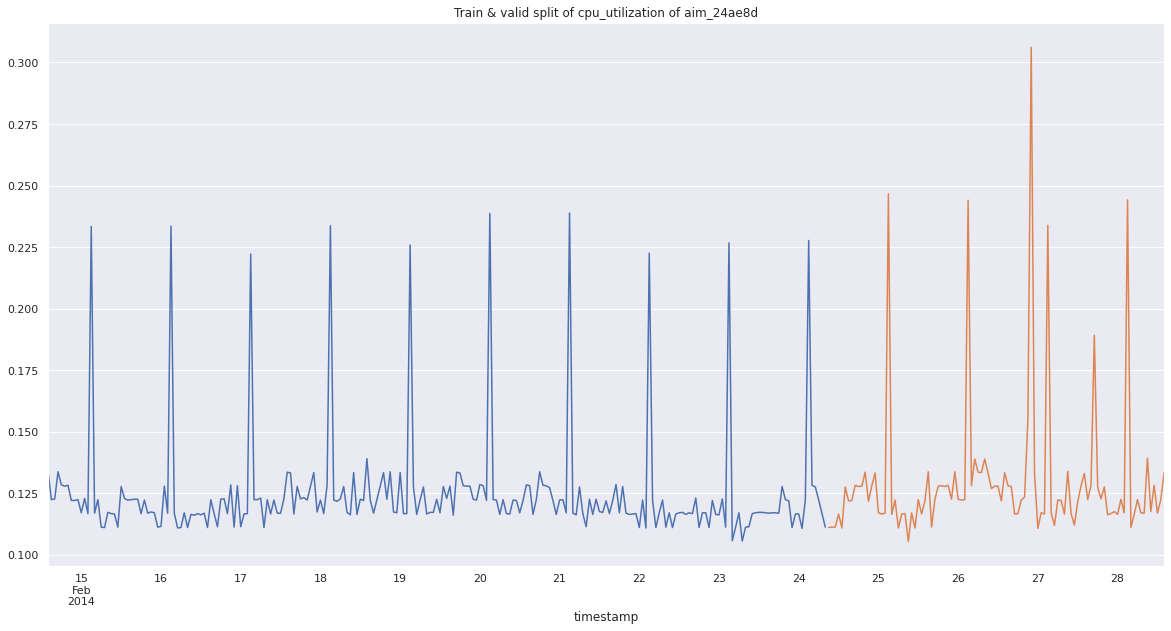

In [31]:
visualize.plot_train_valid(aim_24ae8d, 'aim_24ae8d', 'cpu_utilization', 0.8)

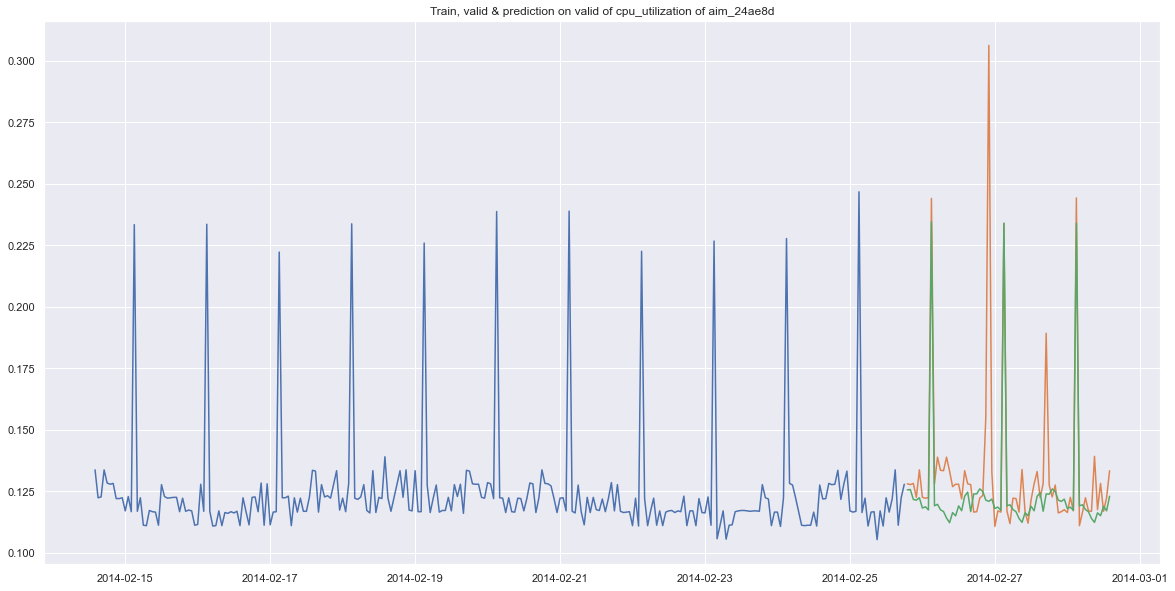

In [32]:
#divide into train and validation set
train = aim_24ae8d[:int(0.8*(len(aim_24ae8d['cpu_utilization'])))]
valid = aim_24ae8d[int(0.8*(len(aim_24ae8d['cpu_utilization']))):]

#preprocessing (since arima takes univariate series as input)
train = train[['cpu_utilization']]
valid = valid[['cpu_utilization']]

model = pm.auto_arima(train, m = 24)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
sns.set(rc={'figure.figsize':(20,10)})
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.title('Train, valid & prediction on valid of cpu_utilization of aim_24ae8d')
plt.show()
sns.reset_orig();

In [33]:
mse = mean_squared_error(valid, forecast)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.025816


ValueError: Shape of passed values is (24, 1), indices imply (68, 1)

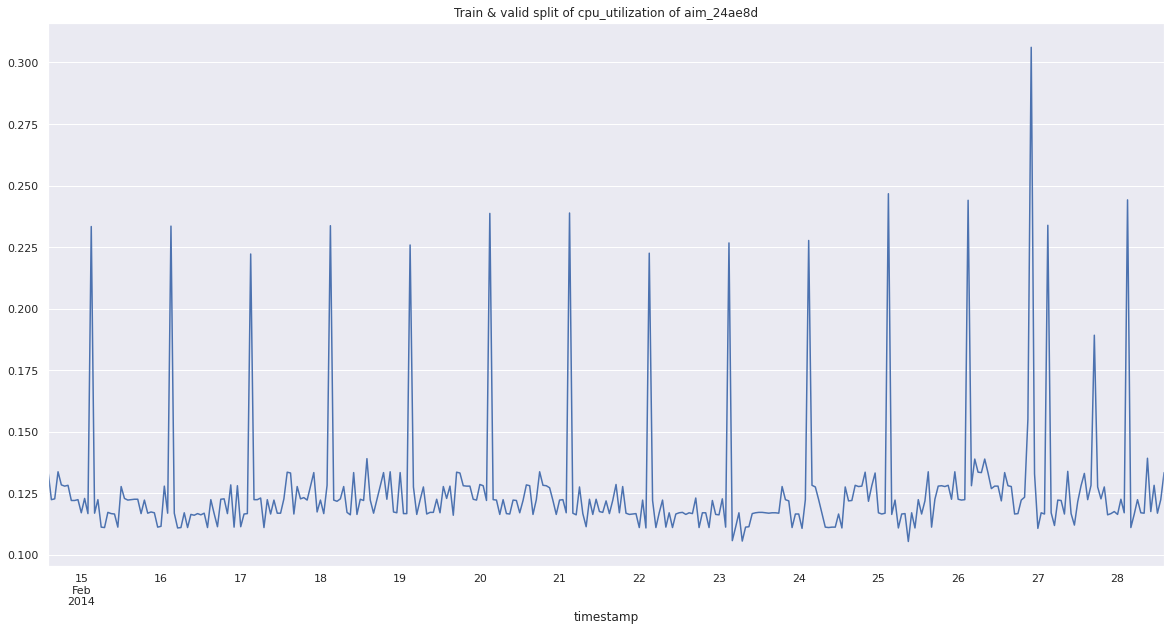

In [38]:
#divide into train and validation set
train = aim_24ae8d[:int(1*(len(aim_24ae8d['cpu_utilization'])))]

#preprocessing (since arima takes univariate series as input)
train = train[['cpu_utilization']]

#plotting the data
sns.set(rc={'figure.figsize':(20,10)})
train['cpu_utilization'].plot()

plt.title('Train & valid split of cpu_utilization of aim_24ae8d')
sns.reset_orig();
model = pm.auto_arima(train, m = 24)

forecast = model.predict(n_periods = 24)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
sns.set(rc={'figure.figsize':(20,10)})
plt.plot(train, label='Train')
plt.plot(forecast, label='Prediction')
plt.title('Train & prediction of cpu_utilization of aim_24ae8d')
plt.show()
sns.reset_orig();